In [1]:
CONFIG = {
    'SEED': 0,  # to reproduce results
    'INPUT_SHAPE': (224, 224),
    'TRAIN_BATCH_SIZE': 16,
    'VAL_BATCH_SIZE': 8,
    'EPOCHS': 20,
    'LEARNING_RATE': 0.01,
    'THRESHOLD': 0.5,
    'NUM_WORKERS': 2,
}

# Downloading Dataset

In [2]:
# update gdown
!pip install --upgrade --no-cache-dir gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=7c8f54b9271f706ed81269178d5802fd40995278407b6a5187f88dd8ad2ba923
  Stored in directory: /tmp/pip-ephem-wheel-cache-x6bmu99_/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


In [3]:
%%bash
# download zip dataset file 
gdown "https://drive.google.com/u/0/uc?id=10J97YhL_0YB298fqekLm0t9rU9jRWEoD" -O dataset.zip

# upzip dataset
unzip dataset.zip

# remove original zip file 
rm dataset.zip

Archive:  dataset.zip
   creating: train-data/
   creating: train-data/okyjD0/
  inflating: train-data/okyjD0/okyjD_2K_Albedo.jpg  
  inflating: train-data/okyjD0/semanticTags.json  
   creating: train-data/okyjF0/
  inflating: train-data/okyjF0/okyjF_2K_Albedo.jpg  
  inflating: train-data/okyjF0/semanticTags.json  
   creating: train-data/okyjJ0/
  inflating: train-data/okyjJ0/okyjJ_2K_Albedo.jpg  
  inflating: train-data/okyjJ0/semanticTags.json  
   creating: train-data/okyjl0/
  inflating: train-data/okyjl0/okyjl_2K_Albedo.jpg  
  inflating: train-data/okyjl0/semanticTags.json  
   creating: train-data/okyjp0/
  inflating: train-data/okyjp0/okyjp_2K_Albedo.jpg  
  inflating: train-data/okyjp0/semanticTags.json  
   creating: train-data/okyjpmp0/
  inflating: train-data/okyjpmp0/okyjpmp_2K_Albedo.jpg  
  inflating: train-data/okyjpmp0/semanticTags.json  
   creating: train-data/okyjqtp0/
  inflating: train-data/okyjqtp0/okyjqtp_2K_Albedo.jpg  
  inflating: train-data/okyjqtp0/seman

Downloading...
From: https://drive.google.com/u/0/uc?id=10J97YhL_0YB298fqekLm0t9rU9jRWEoD
To: /content/dataset.zip
100%|██████████| 1.16G/1.16G [00:10<00:00, 108MB/s]


# Loading Preprocessed Labels

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("labels.csv", index_col=0)

In [8]:
df.head()

,img_path,state_damaged,state_new,state_old,color_black,color_brown,color_gold,color_gray,color_green,color_ivory,color_ochre,color_orange,color_red,color_silver,color_tan,color_taupe,color_umber,color_white,color_yellow
id,,,,,,,,,,,,,,,,,,,
0,train-data/uc0kedqkw/uc0kedqkw_2K_Albedo.jpg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train-data/umsldenlw/umsldenlw_2K_Albedo.jpg,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train-data/pftlI0/pftlI_2K_Albedo.jpg,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train-data/tijmbfkxa/tijmbfkxa_2K_Albedo.jpg,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,train-data/vmciaekg/vmciaekg_2K_Albedo.jpg,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train-Val-Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# using 70% for training 
df_train, df_val_test = train_test_split(df, test_size=0.3, shuffle=True, random_state=CONFIG['SEED'])

In [11]:
# val=15%; test=15%
df_val, df_test = train_test_split(df_val_test, test_size=0.5, shuffle=True, random_state=CONFIG['SEED'])

In [12]:
print(f"Number of TRAIN samples: {len(df_train)}")
print(f"Number of VAL samples: {len(df_val)}")
print(f"Number of TEST samples: {len(df_test)}")

Number of TRAIN samples: 210
Number of VAL samples: 45
Number of TEST samples: 45


In [13]:
df_train.head()

,img_path,state_damaged,state_new,state_old,color_black,color_brown,color_gold,color_gray,color_green,color_ivory,color_ochre,color_orange,color_red,color_silver,color_tan,color_taupe,color_umber,color_white,color_yellow
id,,,,,,,,,,,,,,,,,,,
282,train-data/sb1gvcp0/sb1gvcp_2K_Albedo.jpg,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
44,train-data/rmzkqvp0/rmzkqvp_2K_Albedo.jpg,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
272,train-data/pftlE0/pftlE_2K_Albedo.jpg,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,train-data/pftmc0/pftmc_2K_Albedo.jpg,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,train-data/veimacqs/veimacqs_2K_Albedo.jpg,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Loader and Generator

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [15]:
from torch import optim
from tqdm import tqdm

In [16]:
from PIL import Image

In [17]:
class Dataset(Dataset):
    def __init__(
            self,
            dataframe,
            output_shape=(224, 224),
            transform=None,
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225],
        ):
        self.dataframe = dataframe
        self.output_shape = output_shape
        self.transform = transform
        self.mean = mean
        self.std = std

        self.normalize = transforms.Normalize(mean=mean, std=std)

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.dataframe)
    
    def __getitem__(self, index):
        'Generates one sample of data'
        img_path = self.dataframe.iloc[index, 0]                    # col=0 == img_path 
        Y = self.dataframe.iloc[index, 1:].values                   # remain cols as label
        Y = Y.astype(np.float32)                                    # converting to float32 np array
        Y = torch.tensor(Y, dtype=torch.float32)                    # converting to tensor 

        X = Image.open(img_path)                                    # loading image
        X = X.resize(self.output_shape)                             # resizing image 
        X = transforms.functional.to_tensor(X)                      # PIL image to Tensor

        if self.transform:
            X = self.transform(X)

        X = self.normalize(X)                                       # normalizing image 

        return X, Y

# Training Utilities

In [18]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
def train_model(
    model, 
    training_generator, 
    validation_generator, 
    criterion, 
    optimizer, 
    epochs=20, 
    threshold=0.5, 
    device="cpu"
):
    train_losses = []
    train_accs = []

    val_losses = []
    val_accs = []

    for e in range(epochs): 
        # logging current epoch 
        print(f"Epoch {e+1}/{epochs}")

        # processing an epoch
        train_loss = 0
        train_accuracy = 0
        for images, labels in tqdm(training_generator): 
            # moving X, Y to device 
            images, labels = images.to(device), labels.to(device)

            # forward pass 
            logits = model(images)
            loss = criterion(logits, labels)

            # backward pass 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # accumulating loss 
            train_loss += loss.item()

            # accumulating accuracy 
            ps = torch.sigmoid(logits)          # logits to probs
            preds = (ps >= threshold).float()   # probs to [0, 1]
            equals = preds == labels
            train_accuracy += torch.mean(equals.type(torch.FloatTensor))
        else: 
            # total train epoch loss 
            total_train_loss = train_loss / len(training_generator)
            train_losses.append(total_train_loss)

            # total train accuracy 
            total_train_accuracy = train_accuracy / len(training_generator)
            train_accs.append(total_train_accuracy)

            val_loss = 0
            val_accuracy = 0
            
            # turn off gradients for validation 
            with torch.no_grad(): 
                model.eval()    # switch model to eval mode
                for val_images, val_labels in validation_generator:
                    val_images, val_labels = val_images.to(device), val_labels.to(device)
                    logits = model(val_images)
                    
                    # calculating loss 
                    loss = criterion(logits, val_labels)
                    val_loss += loss.item()

                    # calculating acc
                    ps = torch.sigmoid(logits)          # logits to probs
                    preds = (ps >= threshold).float()   # probs to [0, 1]
                    equals = preds == val_labels
                    val_accuracy += torch.mean(equals.type(torch.FloatTensor))
                    
            # total val epoch loss 
            total_val_loss = val_loss / len(validation_generator)
            val_losses.append(total_val_loss)

            # total val accuracy 
            total_val_accuracy = val_accuracy / len(validation_generator)
            val_accs.append(total_val_accuracy)

            # logging stats 
            print(
                f"loss: {total_train_loss:.4f} - accuracy: {total_train_accuracy:.4f}",
                f"- val_loss: {total_val_loss:.4f} - val_accuracy: {total_val_accuracy:.4f}\n"
            )

            # switch model back to train mode
            model.train()
    
    return train_losses, train_accs, val_losses, val_accs

In [20]:
def evaluate(
    model, 
    test_generator, 
    criterion, 
    threshold=0.5, 
    device="cpu"
): 
    test_loss = 0
    test_accuracy = 0
    
    # turn off gradients for validation 
    with torch.no_grad(): 
        model.eval()    # switch model to eval mode
        for test_images, test_labels in tqdm(test_generator):
            test_images, test_labels = test_images.to(device), test_labels.to(device)
            logits = model(test_images)
            
            # calculating loss 
            loss = criterion(logits, test_labels)
            test_loss += loss.item()

            # calculating acc
            ps = torch.sigmoid(logits)          # logits to probs
            preds = (ps >= threshold).float()   # probs to [0, 1]
            equals = preds == test_labels
            test_accuracy += torch.mean(equals.type(torch.FloatTensor))

    test_loss /= len(test_generator)
    test_accuracy /= len(test_generator)

    print(f"\nTest Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

In [21]:
# Plot training & validation loss/ acc values
def plot_curve(train, val, plot_type="Loss"):
    plt.plot(train)
    plt.plot(val)
    plt.title(f"{plot_type} Plot")
    plt.ylabel(plot_type)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

# Base Model

In [22]:
from torch import nn

In [20]:
class BaseNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_block1 = self.gen_conv_block(in_channels=3, out_channels=32)
        self.conv_block2 = self.gen_conv_block(in_channels=32, out_channels=64)
        self.conv_block3 = self.gen_conv_block(in_channels=64, out_channels=128)
        self.conv_block4 = self.gen_conv_block(in_channels=128, out_channels=256)
        self.conv_block5_1 = self.gen_conv_block(in_channels=256, out_channels=512)
        self.conv_block5_2 = self.gen_conv_block(in_channels=512, out_channels=512)
        self.conv_block5_3 = self.gen_conv_block(in_channels=512, out_channels=512)
    
        self.hidden = nn.Linear(512, 128)
        self.output = nn.Linear(128, 18)

    def gen_conv_block(self, in_channels, out_channels): 
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding='same', stride=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(out_channels),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.conv_block4(x)
        x = self.conv_block5_1(x)
        x = self.conv_block5_2(x)
        x = self.conv_block5_3(x)
        
        # Flatten
        x = x.view(x.size(0), -1)

        # fully connected layer
        x = self.hidden(x)
        x = self.output(x)

        return x

In [21]:
model = BaseNet()

In [22]:
# moving model to GPU if available
model.to(device)

BaseNet(
  (conv_block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3

In [23]:
criterion = torch.nn.BCEWithLogitsLoss()    # Sigmoid + BCE 
optimizer = torch.optim.Adam(params=model.parameters(), lr=CONFIG['LEARNING_RATE']) 

In [24]:
# training data loader 
training_set = Dataset(df_train)
training_generator = DataLoader(training_set, batch_size=CONFIG['TRAIN_BATCH_SIZE'], num_workers=CONFIG['NUM_WORKERS'], shuffle=True)

In [25]:
# validation data loader 
validation_set = Dataset(df_val)
validation_generator = DataLoader(validation_set, batch_size=CONFIG['VAL_BATCH_SIZE'], num_workers=CONFIG['NUM_WORKERS'], shuffle=True)

In [26]:
train_losses, train_accs, val_losses, val_accs = train_model(
        model=model, 
        training_generator=training_generator, 
        validation_generator=validation_generator, 
        criterion=criterion, 
        optimizer=optimizer, 
        epochs= CONFIG['EPOCHS'],
        threshold=CONFIG['THRESHOLD'], 
        device=device
    )

Epoch 1/20


100%|██████████| 14/14 [00:33<00:00,  2.36s/it]


loss: 0.6292 - accuracy: 0.8103 - val_loss: 2.8319 - val_accuracy: 0.8676

Epoch 2/20


100%|██████████| 14/14 [00:44<00:00,  3.20s/it]


loss: 0.4734 - accuracy: 0.8681 - val_loss: 1.2999 - val_accuracy: 0.8595

Epoch 3/20


100%|██████████| 14/14 [00:34<00:00,  2.49s/it]


loss: 0.3653 - accuracy: 0.8807 - val_loss: 0.8746 - val_accuracy: 0.8866

Epoch 4/20


100%|██████████| 14/14 [00:30<00:00,  2.17s/it]


loss: 0.2671 - accuracy: 0.8938 - val_loss: 0.4697 - val_accuracy: 0.8819

Epoch 5/20


100%|██████████| 14/14 [00:39<00:00,  2.80s/it]


loss: 0.2281 - accuracy: 0.9102 - val_loss: 0.3458 - val_accuracy: 0.8831

Epoch 6/20


100%|██████████| 14/14 [00:29<00:00,  2.11s/it]


loss: 0.2206 - accuracy: 0.9110 - val_loss: 0.2896 - val_accuracy: 0.9100

Epoch 7/20


100%|██████████| 14/14 [00:30<00:00,  2.15s/it]


loss: 0.2477 - accuracy: 0.9048 - val_loss: 0.2218 - val_accuracy: 0.9118

Epoch 8/20


100%|██████████| 14/14 [00:30<00:00,  2.15s/it]


loss: 0.2219 - accuracy: 0.9065 - val_loss: 0.3924 - val_accuracy: 0.8889

Epoch 9/20


100%|██████████| 14/14 [00:29<00:00,  2.10s/it]


loss: 0.2279 - accuracy: 0.9080 - val_loss: 0.2777 - val_accuracy: 0.9102

Epoch 10/20


100%|██████████| 14/14 [00:29<00:00,  2.09s/it]


loss: 0.2315 - accuracy: 0.9060 - val_loss: 0.2316 - val_accuracy: 0.9102

Epoch 11/20


100%|██████████| 14/14 [00:28<00:00,  2.04s/it]


loss: 0.2280 - accuracy: 0.9105 - val_loss: 0.2289 - val_accuracy: 0.9160

Epoch 12/20


100%|██████████| 14/14 [00:28<00:00,  2.04s/it]


loss: 0.2170 - accuracy: 0.9120 - val_loss: 0.2158 - val_accuracy: 0.9229

Epoch 13/20


100%|██████████| 14/14 [00:28<00:00,  2.07s/it]


loss: 0.2226 - accuracy: 0.9050 - val_loss: 0.2181 - val_accuracy: 0.9130

Epoch 14/20


100%|██████████| 14/14 [00:28<00:00,  2.03s/it]


loss: 0.2104 - accuracy: 0.9097 - val_loss: 0.2403 - val_accuracy: 0.9106

Epoch 15/20


100%|██████████| 14/14 [00:28<00:00,  2.05s/it]


loss: 0.2172 - accuracy: 0.9065 - val_loss: 0.2178 - val_accuracy: 0.9190

Epoch 16/20


100%|██████████| 14/14 [00:28<00:00,  2.03s/it]


loss: 0.2271 - accuracy: 0.8993 - val_loss: 0.2397 - val_accuracy: 0.9028

Epoch 17/20


100%|██████████| 14/14 [00:28<00:00,  2.05s/it]


loss: 0.2231 - accuracy: 0.9107 - val_loss: 0.2599 - val_accuracy: 0.8891

Epoch 18/20


100%|██████████| 14/14 [00:41<00:00,  2.93s/it]


loss: 0.2270 - accuracy: 0.9035 - val_loss: 0.2453 - val_accuracy: 0.9083

Epoch 19/20


100%|██████████| 14/14 [00:34<00:00,  2.45s/it]


loss: 0.2107 - accuracy: 0.9060 - val_loss: 0.2025 - val_accuracy: 0.9229

Epoch 20/20


100%|██████████| 14/14 [00:27<00:00,  1.99s/it]


loss: 0.2049 - accuracy: 0.9105 - val_loss: 0.2388 - val_accuracy: 0.9072



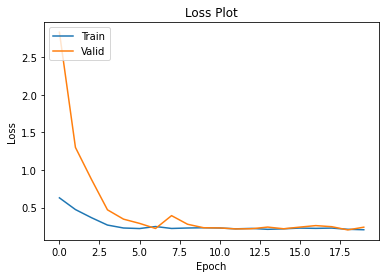

In [27]:
# Plot training & validation loss values
plot_curve(train_losses, val_losses, plot_type="Loss")

In [30]:
# validation data loader 
test_set = Dataset(df_test)
test_generator = DataLoader(test_set, batch_size=CONFIG['VAL_BATCH_SIZE'], num_workers=CONFIG['NUM_WORKERS'], shuffle=False)

# evaluating on test set 
evaluate(
    model, 
    test_generator, 
    criterion, 
    threshold=CONFIG['THRESHOLD'], 
    device=device
)

100%|██████████| 6/6 [00:05<00:00,  1.00it/s]


Test Loss: 0.2407
Test Accuracy: 0.8984


In [44]:
# saving model 
torch.save(model.state_dict(), "base_model.pth")

# Transfer Learning

In [19]:
import torchvision.models as models

class TransferNet(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()

        resnet18 = models.resnet18(pretrained=pretrained)

        # fetching size of in_features to fc layer
        num_ftrs = resnet18.fc.in_features

        # replacing fc layer to match num_outputs=18
        resnet18.fc = nn.Sequential(
            nn.Dropout(p=0.3), # adding regularization
            nn.Linear(num_ftrs, 18)
        )

        self.base_model = resnet18

    def forward(self, x):
        x = self.base_model(x)

        return x

In [20]:
model = TransferNet()

In [21]:
# moving model to GPU if available
model.to(device)

TransferNet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [22]:
criterion = torch.nn.BCEWithLogitsLoss()    # Sigmoid + BCE 
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001) 

In [23]:
# training data loader 
training_set = Dataset(df_train)
training_generator = DataLoader(training_set, batch_size=CONFIG['TRAIN_BATCH_SIZE'], num_workers=CONFIG['NUM_WORKERS'], shuffle=True)

In [24]:
# validation data loader 
validation_set = Dataset(df_val)
validation_generator = DataLoader(validation_set, batch_size=CONFIG['VAL_BATCH_SIZE'], num_workers=CONFIG['NUM_WORKERS'], shuffle=True)

In [25]:
train_losses, train_accs, val_losses, val_accs = train_model(
        model=model, 
        training_generator=training_generator, 
        validation_generator=validation_generator, 
        criterion=criterion, 
        optimizer=optimizer, 
        epochs=CONFIG['EPOCHS'], 
        threshold=CONFIG['THRESHOLD'],
        device=device
    )

Epoch 1/20


100%|██████████| 14/14 [00:29<00:00,  2.10s/it]


loss: 0.3413 - accuracy: 0.8584 - val_loss: 0.6881 - val_accuracy: 0.8880

Epoch 2/20


100%|██████████| 14/14 [00:40<00:00,  2.89s/it]


loss: 0.1965 - accuracy: 0.9236 - val_loss: 1.0161 - val_accuracy: 0.8775

Epoch 3/20


100%|██████████| 14/14 [00:28<00:00,  2.07s/it]


loss: 0.2104 - accuracy: 0.9191 - val_loss: 0.3900 - val_accuracy: 0.9120

Epoch 4/20


100%|██████████| 14/14 [00:29<00:00,  2.10s/it]


loss: 0.1928 - accuracy: 0.9249 - val_loss: 0.2648 - val_accuracy: 0.9169

Epoch 5/20


100%|██████████| 14/14 [00:29<00:00,  2.07s/it]


loss: 0.1778 - accuracy: 0.9278 - val_loss: 0.2191 - val_accuracy: 0.9269

Epoch 6/20


100%|██████████| 14/14 [00:29<00:00,  2.09s/it]


loss: 0.1684 - accuracy: 0.9283 - val_loss: 0.1968 - val_accuracy: 0.9310

Epoch 7/20


100%|██████████| 14/14 [00:28<00:00,  2.05s/it]


loss: 0.1606 - accuracy: 0.9303 - val_loss: 0.2410 - val_accuracy: 0.9303

Epoch 8/20


100%|██████████| 14/14 [00:28<00:00,  2.04s/it]


loss: 0.1530 - accuracy: 0.9335 - val_loss: 0.2409 - val_accuracy: 0.9280

Epoch 9/20


100%|██████████| 14/14 [00:27<00:00,  2.00s/it]


loss: 0.1527 - accuracy: 0.9375 - val_loss: 0.2841 - val_accuracy: 0.9120

Epoch 10/20


100%|██████████| 14/14 [00:28<00:00,  2.04s/it]


loss: 0.1445 - accuracy: 0.9382 - val_loss: 0.1944 - val_accuracy: 0.9389

Epoch 11/20


100%|██████████| 14/14 [00:28<00:00,  2.01s/it]


loss: 0.1423 - accuracy: 0.9412 - val_loss: 0.2711 - val_accuracy: 0.9331

Epoch 12/20


100%|██████████| 14/14 [00:28<00:00,  2.04s/it]


loss: 0.1386 - accuracy: 0.9435 - val_loss: 0.2475 - val_accuracy: 0.9171

Epoch 13/20


100%|██████████| 14/14 [00:27<00:00,  1.99s/it]


loss: 0.1380 - accuracy: 0.9459 - val_loss: 0.1861 - val_accuracy: 0.9333

Epoch 14/20


100%|██████████| 14/14 [00:28<00:00,  2.04s/it]


loss: 0.1476 - accuracy: 0.9415 - val_loss: 0.2495 - val_accuracy: 0.9167

Epoch 15/20


100%|██████████| 14/14 [00:28<00:00,  2.03s/it]


loss: 0.1380 - accuracy: 0.9482 - val_loss: 0.2526 - val_accuracy: 0.9032

Epoch 16/20


100%|██████████| 14/14 [00:28<00:00,  2.04s/it]


loss: 0.1407 - accuracy: 0.9427 - val_loss: 0.2269 - val_accuracy: 0.9310

Epoch 17/20


100%|██████████| 14/14 [00:28<00:00,  2.02s/it]


loss: 0.1235 - accuracy: 0.9521 - val_loss: 0.2319 - val_accuracy: 0.9222

Epoch 18/20


100%|██████████| 14/14 [00:33<00:00,  2.41s/it]


loss: 0.1295 - accuracy: 0.9521 - val_loss: 0.2232 - val_accuracy: 0.9220

Epoch 19/20


100%|██████████| 14/14 [00:28<00:00,  2.01s/it]


loss: 0.1166 - accuracy: 0.9516 - val_loss: 0.2531 - val_accuracy: 0.9150

Epoch 20/20


100%|██████████| 14/14 [00:28<00:00,  2.02s/it]


loss: 0.1428 - accuracy: 0.9506 - val_loss: 0.2603 - val_accuracy: 0.9178



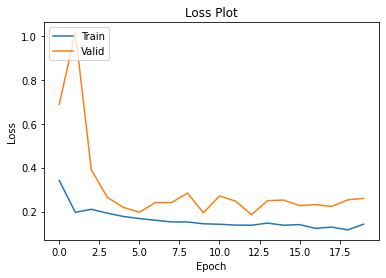

In [26]:
# Plot training & validation loss values
plot_curve(train_losses, val_losses, plot_type="Loss")

In [27]:
# validation data loader 
test_set = Dataset(df_test)
test_generator = DataLoader(test_set, batch_size=CONFIG['VAL_BATCH_SIZE'], num_workers=CONFIG['NUM_WORKERS'], shuffle=False)

# evaluating on test set 
evaluate(
    model, 
    test_generator, 
    criterion, 
    threshold=CONFIG['THRESHOLD'], 
    device=device
)

100%|██████████| 6/6 [00:06<00:00,  1.05s/it]


Test Loss: 0.2578
Test Accuracy: 0.9083


In [28]:
# saving model 
torch.save(model.state_dict(), "transfer_model.pth")

# Deep Transfer Learning

In [23]:
import torchvision.models as models

class DeepTransferNet(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()

        resnext50 = models.resnext50_32x4d(pretrained=pretrained)

        # fetching size of in_features to fc layer
        num_ftrs = resnext50.fc.in_features

        # replacing fc layer to match num_outputs=18
        resnext50.fc = nn.Sequential(
            nn.Dropout(p=0.3), # adding regularization
            nn.Linear(num_ftrs, 18)
        )

        self.base_model = resnext50

    def forward(self, x):
        x = self.base_model(x)

        return x

In [24]:
model = DeepTransferNet()

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth


  0%|          | 0.00/95.8M [00:00<?, ?B/s]

In [25]:
# moving model to GPU if available
model.to(device)

DeepTransferNet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsam

In [26]:
criterion = torch.nn.BCEWithLogitsLoss()    # Sigmoid + BCE 
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001) 

In [27]:
# training data loader 
training_set = Dataset(df_train)
training_generator = DataLoader(training_set, batch_size=CONFIG['TRAIN_BATCH_SIZE'], num_workers=CONFIG['NUM_WORKERS'], shuffle=True)

In [28]:
# validation data loader 
validation_set = Dataset(df_val)
validation_generator = DataLoader(validation_set, batch_size=CONFIG['VAL_BATCH_SIZE'], num_workers=CONFIG['NUM_WORKERS'], shuffle=True)

In [29]:
train_losses, train_accs, val_losses, val_accs = train_model(
        model=model, 
        training_generator=training_generator, 
        validation_generator=validation_generator, 
        criterion=criterion, 
        optimizer=optimizer, 
        epochs=CONFIG['EPOCHS'], 
        threshold=CONFIG['THRESHOLD'],
        device=device
    )

Epoch 1/20


100%|██████████| 14/14 [00:32<00:00,  2.32s/it]


loss: 0.2879 - accuracy: 0.8901 - val_loss: 7.6821 - val_accuracy: 0.8977

Epoch 2/20


100%|██████████| 14/14 [00:30<00:00,  2.19s/it]


loss: 0.2069 - accuracy: 0.9204 - val_loss: 1.6730 - val_accuracy: 0.9169

Epoch 3/20


100%|██████████| 14/14 [00:31<00:00,  2.24s/it]


loss: 0.2234 - accuracy: 0.9144 - val_loss: 0.3268 - val_accuracy: 0.9100

Epoch 4/20


100%|██████████| 14/14 [00:30<00:00,  2.17s/it]


loss: 0.1952 - accuracy: 0.9229 - val_loss: 0.3777 - val_accuracy: 0.8975

Epoch 5/20


100%|██████████| 14/14 [00:30<00:00,  2.18s/it]


loss: 0.1797 - accuracy: 0.9278 - val_loss: 0.4093 - val_accuracy: 0.9134

Epoch 6/20


100%|██████████| 14/14 [00:30<00:00,  2.17s/it]


loss: 0.1934 - accuracy: 0.9206 - val_loss: 0.2447 - val_accuracy: 0.9252

Epoch 7/20


100%|██████████| 14/14 [00:30<00:00,  2.16s/it]


loss: 0.1812 - accuracy: 0.9273 - val_loss: 0.2117 - val_accuracy: 0.9153

Epoch 8/20


100%|██████████| 14/14 [00:30<00:00,  2.16s/it]


loss: 0.1989 - accuracy: 0.9216 - val_loss: 0.2992 - val_accuracy: 0.9127

Epoch 9/20


100%|██████████| 14/14 [00:30<00:00,  2.17s/it]


loss: 0.1752 - accuracy: 0.9291 - val_loss: 0.8979 - val_accuracy: 0.9125

Epoch 10/20


100%|██████████| 14/14 [00:30<00:00,  2.17s/it]


loss: 0.1986 - accuracy: 0.9231 - val_loss: 0.2139 - val_accuracy: 0.9231

Epoch 11/20


100%|██████████| 14/14 [00:30<00:00,  2.18s/it]


loss: 0.1873 - accuracy: 0.9293 - val_loss: 0.2458 - val_accuracy: 0.9313

Epoch 12/20


100%|██████████| 14/14 [00:30<00:00,  2.17s/it]


loss: 0.1704 - accuracy: 0.9325 - val_loss: 0.5047 - val_accuracy: 0.9109

Epoch 13/20


100%|██████████| 14/14 [00:30<00:00,  2.17s/it]


loss: 0.1700 - accuracy: 0.9301 - val_loss: 0.2429 - val_accuracy: 0.9312

Epoch 14/20


100%|██████████| 14/14 [00:30<00:00,  2.19s/it]


loss: 0.1593 - accuracy: 0.9335 - val_loss: 0.2186 - val_accuracy: 0.9275

Epoch 15/20


100%|██████████| 14/14 [00:30<00:00,  2.19s/it]


loss: 0.1491 - accuracy: 0.9387 - val_loss: 0.3092 - val_accuracy: 0.9225

Epoch 16/20


100%|██████████| 14/14 [00:30<00:00,  2.18s/it]


loss: 0.1523 - accuracy: 0.9390 - val_loss: 0.2527 - val_accuracy: 0.9250

Epoch 17/20


100%|██████████| 14/14 [00:30<00:00,  2.17s/it]


loss: 0.1630 - accuracy: 0.9330 - val_loss: 0.2681 - val_accuracy: 0.9081

Epoch 18/20


100%|██████████| 14/14 [00:30<00:00,  2.17s/it]


loss: 0.1578 - accuracy: 0.9315 - val_loss: 0.2271 - val_accuracy: 0.9164

Epoch 19/20


100%|██████████| 14/14 [00:30<00:00,  2.18s/it]


loss: 0.1540 - accuracy: 0.9370 - val_loss: 0.5778 - val_accuracy: 0.9185

Epoch 20/20


100%|██████████| 14/14 [00:30<00:00,  2.20s/it]


loss: 0.1457 - accuracy: 0.9380 - val_loss: 0.2314 - val_accuracy: 0.9201



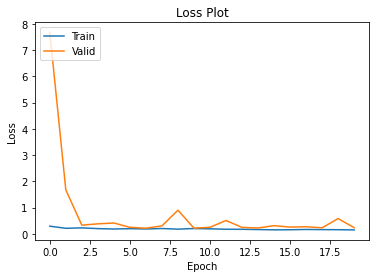

In [30]:
# Plot training & validation loss values
plot_curve(train_losses, val_losses, plot_type="Loss")

In [31]:
# validation data loader 
test_set = Dataset(df_test)
test_generator = DataLoader(test_set, batch_size=CONFIG['VAL_BATCH_SIZE'], num_workers=CONFIG['NUM_WORKERS'], shuffle=False)

# evaluating on test set 
evaluate(
    model, 
    test_generator, 
    criterion, 
    threshold=CONFIG['THRESHOLD'], 
    device=device
)

100%|██████████| 6/6 [00:06<00:00,  1.06s/it]


Test Loss: 0.2117
Test Accuracy: 0.9174


In [32]:
# saving model 
torch.save(model.state_dict(), "deep_transfer_model.pth")